In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)

In [3]:
path_1 = '../Data/Preprocessing/Data Losarang/2022/2_input_losarang_2022.xlsx'

df = read_excel(path_1)
df.head()

,WAKTU,TAHUN,BULAN,PEKAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,JUMLAH,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022-01-01 00:00:00,2022,1,1,1,Saturday,00:00,185,39,24,248,148.0,39,60.0,247
1,2022-01-01 00:15:00,2022,1,1,1,Saturday,00:15,195,64,35,294,156.0,64,87.5,308
2,2022-01-01 00:30:00,2022,1,1,1,Saturday,00:30,194,49,17,260,155.2,49,42.5,247
3,2022-01-01 00:45:00,2022,1,1,1,Saturday,00:45,162,43,21,226,129.6,43,52.5,225
4,2022-01-01 01:00:00,2022,1,1,1,Saturday,01:00,125,58,18,201,100.0,58,45.0,203


In [4]:
df['SMP'] = df['SMP_MTR']+df['SMP_MBL']+df['SMP_TRK']

In [5]:
df.head()

,WAKTU,TAHUN,BULAN,PEKAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,JUMLAH,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022-01-01 00:00:00,2022,1,1,1,Saturday,00:00,185,39,24,248,148.0,39,60.0,247.0
1,2022-01-01 00:15:00,2022,1,1,1,Saturday,00:15,195,64,35,294,156.0,64,87.5,307.5
2,2022-01-01 00:30:00,2022,1,1,1,Saturday,00:30,194,49,17,260,155.2,49,42.5,246.7
3,2022-01-01 00:45:00,2022,1,1,1,Saturday,00:45,162,43,21,226,129.6,43,52.5,225.1
4,2022-01-01 01:00:00,2022,1,1,1,Saturday,01:00,125,58,18,201,100.0,58,45.0,203.0


In [6]:
df_smp = df[['WAKTU','TAHUN', 'BULAN', 'TANGGAL', 'HARI','JAM','MOTOR','MOBIL','TRUK/BUS',
                              'SMP_MTR','SMP_MBL','SMP_TRK','SMP']]

In [7]:
df_smp.head()

,WAKTU,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022-01-01 00:00:00,2022,1,1,Saturday,00:00,185,39,24,148.0,39,60.0,247.0
1,2022-01-01 00:15:00,2022,1,1,Saturday,00:15,195,64,35,156.0,64,87.5,307.5
2,2022-01-01 00:30:00,2022,1,1,Saturday,00:30,194,49,17,155.2,49,42.5,246.7
3,2022-01-01 00:45:00,2022,1,1,Saturday,00:45,162,43,21,129.6,43,52.5,225.1
4,2022-01-01 01:00:00,2022,1,1,Saturday,01:00,125,58,18,100.0,58,45.0,203.0


In [8]:
len(df_smp)

35040

# Group SMP Per Jam

In [9]:
# Round down the WAKTU column to the nearest hour
df_smp_jam = df_smp.copy()
df_smp_jam['JAM'] = df_smp['WAKTU'].dt.floor('H')

# Drop the original WAKTU column if it's not needed anymore
df_smp_jam = df_smp_jam.drop(columns=['WAKTU'])

# Format the 'JAM' column to show only hour and minute
df_smp_jam['JAM'] = df_smp_jam['JAM'].dt.strftime('%H:%M')

# Group by the rounded-down hour and sum the SMP column
df_smp_jam = df_smp_jam.groupby(['TAHUN', 'BULAN', 'TANGGAL', 'HARI', 'JAM'], as_index=False).sum()

In [10]:
df_smp_jam.head()

,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022,1,1,Saturday,00:00,736,195,97,588.8,195,242.5,1026.3
1,2022,1,1,Saturday,01:00,521,201,74,416.8,201,185.0,802.8
2,2022,1,1,Saturday,02:00,357,178,66,285.6,178,165.0,628.6
3,2022,1,1,Saturday,03:00,322,160,53,257.6,160,132.5,550.1
4,2022,1,1,Saturday,04:00,224,118,63,179.2,118,157.5,454.7


In [11]:
len(df_smp_jam)

8760

In [12]:
df_smp_jam.to_excel('../Data/Preprocessing/Data Losarang/2022/8_smp_jam_losarang_2022.xlsx', index=False)

# Group SMP Per Hari

In [13]:
df_smp_hari = df_smp_jam.copy()

In [14]:
df_smp_hari = df_smp_hari.drop(columns=['JAM'])

In [15]:
df_smp_hari = df_smp_hari.groupby(['TAHUN', 'BULAN', 'TANGGAL', 'HARI'], as_index=False).sum()

In [16]:
df_smp_hari.head()

,TAHUN,BULAN,TANGGAL,HARI,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022,1,1,Saturday,15147,5951,2978,12117.6,5951,7445.0,25513.6
1,2022,1,2,Sunday,13361,6315,2660,10688.8,6315,6650.0,23653.8
2,2022,1,3,Monday,12848,6856,4215,10278.4,6856,10537.5,27671.9
3,2022,1,4,Tuesday,11491,6571,5867,9192.8,6571,14667.5,30431.3
4,2022,1,5,Wednesday,11686,7493,7800,9348.8,7493,19500.0,36341.8


In [17]:
len(df_smp_hari)

365

In [18]:
df_smp_hari.to_excel('../Data/Preprocessing/Data Losarang/2022/8_smp_hari_losarang_2022.xlsx', index=False)

# Group SMP Per Bulan

In [19]:
df_smp_bln = df_smp_hari.copy()

In [20]:
df_smp_bln = df_smp_bln.drop(columns=['TANGGAL','HARI'])

In [21]:
df_smp_bln.head()

,TAHUN,BULAN,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022,1,15147,5951,2978,12117.6,5951,7445.0,25513.6
1,2022,1,13361,6315,2660,10688.8,6315,6650.0,23653.8
2,2022,1,12848,6856,4215,10278.4,6856,10537.5,27671.9
3,2022,1,11491,6571,5867,9192.8,6571,14667.5,30431.3
4,2022,1,11686,7493,7800,9348.8,7493,19500.0,36341.8


In [22]:
df_smp_bln = df_smp_bln.groupby(['TAHUN', 'BULAN'], as_index=False).sum()

In [23]:
df_smp_bln.head()

,TAHUN,BULAN,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022,1,362841,229377,174090,290272.8,229377,435225.0,954874.8
1,2022,2,303128,172827,153102,242502.4,172827,382755.0,798084.4
2,2022,3,366027,197535,179066,292821.6,197535,447665.0,938021.6
3,2022,4,343546,186203,173847,274836.8,186203,434617.5,895657.3
4,2022,5,481667,283073,167316,385333.6,283073,418290.0,1086696.6


In [24]:
len(df_smp_bln)

12

In [25]:
df_smp_bln.to_excel('../Data/Preprocessing/Data Losarang/2022/8_smp_bulan_losarang_2022.xlsx', index=False)

# Menghitung LHRT (AADT)

In [26]:
# Menghitung AADT
aadts = {}
for month in df_smp_hari['BULAN'].unique():
    monthly_data = df_smp_hari[df_smp_hari['BULAN'] == month]
    weekly_averages = []
    for day in monthly_data['HARI'].unique():
        daily_data = monthly_data[monthly_data['HARI'] == day]
        daily_average = daily_data['SMP'].mean()
        weekly_averages.append(daily_average)
    monthly_average = np.mean(weekly_averages)
    aadts[f'Bulan {month}'] = monthly_average

# Mengubah dictionary menjadi DataFrame
aadts_df = pd.DataFrame(list(aadts.items()), columns=['Bulan', 'Rata-Rata Volume'])

In [27]:
aadts_df.head(12)

,Bulan,Rata-Rata Volume
0,Bulan 1,30963.886429
1,Bulan 2,28503.014286
2,Bulan 3,30153.800000
3,Bulan 4,29675.592143
4,Bulan 5,35009.897143
5,Bulan 6,30836.445714
6,Bulan 7,32129.070714
7,Bulan 8,31288.851429
8,Bulan 9,30786.148571
9,Bulan 10,29870.267143


In [28]:
aadt = aadts_df['Rata-Rata Volume'].mean()
print(f"Estimated AADT is {aadt}")

Estimated AADT is 30646.47345238095


In [29]:
aadt_simple = df_smp_hari['SMP'].mean()
print(f"Estimated AADT is {aadt_simple}")

Estimated AADT is 30694.083013698633


In [30]:
aadts_df.to_excel('../Data/Preprocessing/Data Losarang/2022/8_aadt_bulan_losarang_2022.xlsx', index=False)

In [31]:
aadts_df

,Bulan,Rata-Rata Volume
0,Bulan 1,30963.886429
1,Bulan 2,28503.014286
2,Bulan 3,30153.800000
3,Bulan 4,29675.592143
4,Bulan 5,35009.897143
5,Bulan 6,30836.445714
6,Bulan 7,32129.070714
7,Bulan 8,31288.851429
8,Bulan 9,30786.148571
9,Bulan 10,29870.267143


# Menghitung Faktor K

In [32]:
df_k = df_smp_jam.copy()
df_k = df_k.sort_values('SMP', ascending=False)
df_k = df_k.reset_index(drop=True)

In [33]:
df_k.head()

,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2022,5,1,Sunday,06:00,5179,590,137,4143.2,590,342.5,5075.7
1,2022,5,1,Sunday,00:00,4317,472,57,3453.6,472,142.5,4068.1
2,2022,5,3,Tuesday,09:00,3054,1010,235,2443.2,1010,587.5,4040.7
3,2022,5,3,Tuesday,10:00,3007,1093,195,2405.6,1093,487.5,3986.1
4,2022,5,1,Sunday,02:00,4292,418,34,3433.6,418,85.0,3936.6


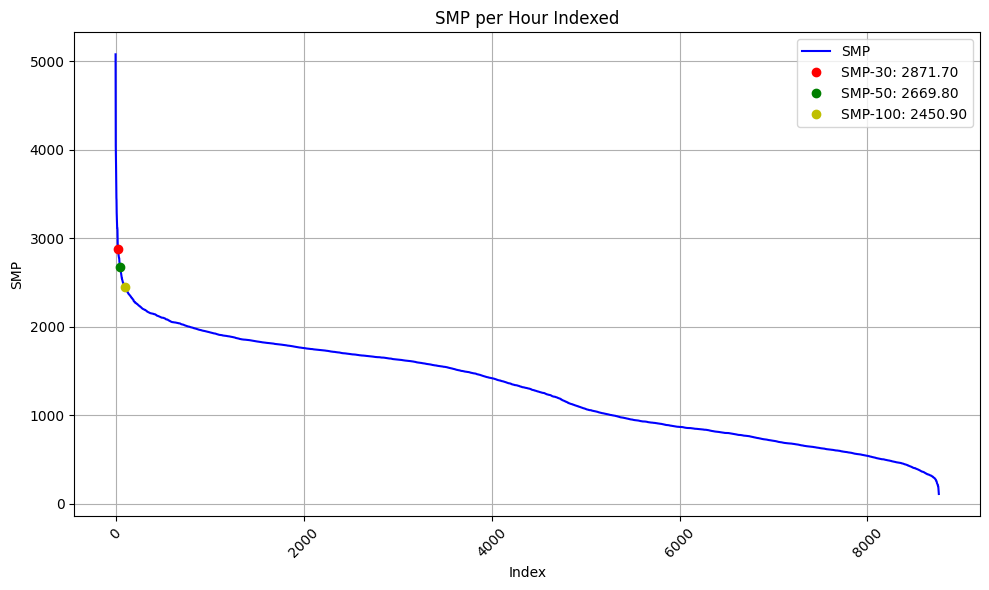

In [34]:
# Assuming df_k_200 is already sorted by 'SMP'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the entire SMP data
ax.plot(df_k.index, df_k['SMP'], linestyle='-', color='blue', label='SMP')

# Highlight the 30th, 50th, and 100th highest volumes
k30_point = ax.plot(29, df_k.iloc[29]['SMP'], 'ro', label=f'SMP-30: {df_k.iloc[29]["SMP"]:.2f}')
k50_point = ax.plot(49, df_k.iloc[49]['SMP'], 'go', label=f'SMP-50: {df_k.iloc[49]["SMP"]:.2f}')
k100_point = ax.plot(99, df_k.iloc[99]['SMP'], 'yo', label=f'SMP-100: {df_k.iloc[99]["SMP"]:.2f}')

# Setting plot titles and labels
ax.set_title('SMP per Hour Indexed')
ax.set_xlabel('Index')
ax.set_ylabel('SMP')
ax.grid(True)

# Adding legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df_k_200 = df_k.head(200)

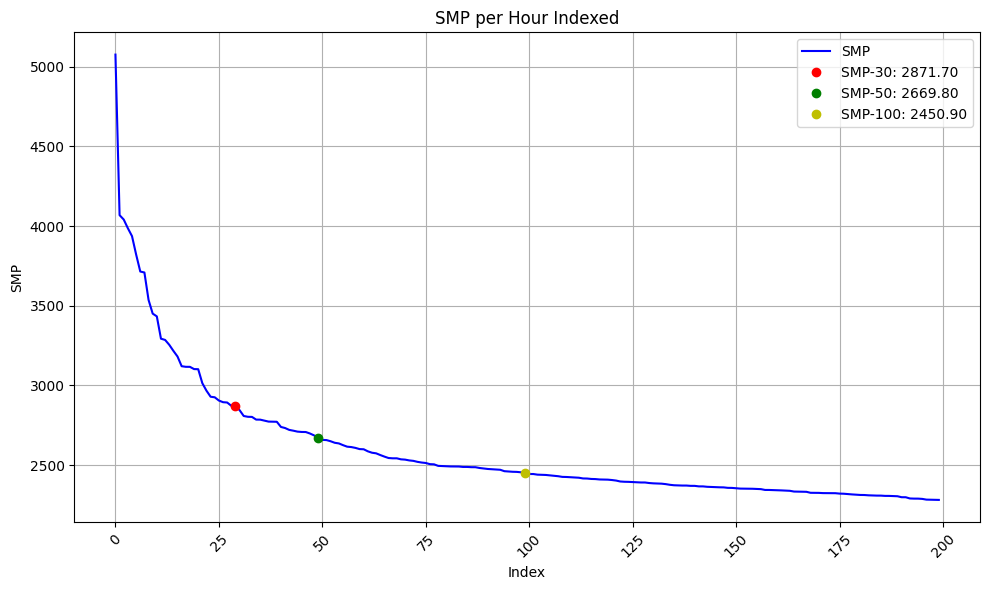

In [36]:
# Assuming df_k_200 is already sorted by 'SMP'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the entire SMP data
ax.plot(df_k_200.index, df_k_200['SMP'], linestyle='-', color='blue', label='SMP')

# Highlight the 30th, 50th, and 100th highest volumes
k30_point = ax.plot(29, df_k_200.iloc[29]['SMP'], 'ro', label=f'SMP-30: {df_k_200.iloc[29]["SMP"]:.2f}')
k50_point = ax.plot(49, df_k_200.iloc[49]['SMP'], 'go', label=f'SMP-50: {df_k_200.iloc[49]["SMP"]:.2f}')
k100_point = ax.plot(99, df_k_200.iloc[99]['SMP'], 'yo', label=f'SMP-100: {df_k_200.iloc[99]["SMP"]:.2f}')

# Setting plot titles and labels
ax.set_title('SMP per Hour Indexed')
ax.set_xlabel('Index')
ax.set_ylabel('SMP')
ax.grid(True)

# Adding legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
faktor_k = {}

# Assuming df_k is sorted by 'SMP' in descending order and AADT is predefined
K_30 = (df_k.loc[29, 'SMP'] / aadt) * 100  # Accessing the 30th highest value
K_50 = (df_k.loc[49, 'SMP'] / aadt) * 100  # Accessing the 50th highest value
K_100 = (df_k.loc[99, 'SMP'] / aadt) * 100  # Accessing the 100th highest value

faktor_k['K-30'] = f"{K_30:.2f}%"
faktor_k['K-50'] = f"{K_50:.2f}%"
faktor_k['K-100'] = f"{K_100:.2f}%"

# Mengubah dictionary menjadi DataFrame
faktor_k_df = pd.DataFrame(list(faktor_k.items()), columns=['K', 'Factor'])

In [38]:
faktor_k_df.head()

,K,Factor
0,K-30,9.37%
1,K-50,8.71%
2,K-100,8.00%


In [39]:
faktor_k_df.to_excel('../Data/Preprocessing/Data Losarang/2022/8_faktor_k_losarang_2022.xlsx', index=False)